In [61]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns 
import warnings 
warnings.filterwarnings("ignore")

import os
print(os.listdir("./inputs"))

%matplotlib inline

['zoo.csv', 'class.csv']


### 1. Read Data

In [62]:
animal = pd.read_csv('./inputs/zoo.csv')
animal.head(10)

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
6,calf,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
7,carp,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
8,catfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
9,cavy,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1


In [63]:
animal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
animal_name    101 non-null object
hair           101 non-null int64
feathers       101 non-null int64
eggs           101 non-null int64
milk           101 non-null int64
airborne       101 non-null int64
aquatic        101 non-null int64
predator       101 non-null int64
toothed        101 non-null int64
backbone       101 non-null int64
breathes       101 non-null int64
venomous       101 non-null int64
fins           101 non-null int64
legs           101 non-null int64
tail           101 non-null int64
domestic       101 non-null int64
catsize        101 non-null int64
class_type     101 non-null int64
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


### 2. Data Processing


In [64]:
# Evaluate the missing values and duplicates
animal.isnull().sum()

animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
class_type     0
dtype: int64

In [65]:
#check if there are duplicates in animal_name
duplicates = animal.animal_name.value_counts()
duplicates[duplicates > 1]

frog    2
Name: animal_name, dtype: int64

In [66]:
#select these duplicates frog
frog = animal.loc[animal['animal_name'] == 'frog']
frog

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
25,frog,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,0,5
26,frog,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,5


In [67]:
# observation: find that one frog is venomous and another one is not 
#              change the venomous one into frog2 to seperate 2 kinds of frog 
animal['animal_name'][(animal.venomous == 1 )& (animal.animal_name == 'frog')] = "frog2"

In [68]:
# finding Unique value of hair
color_list = [("red" if i == 1 else "blue" if i == 0 else "yellow" ) for i in animal.hair]
unique_color = list(set(color_list))
unique_color

['blue', 'red']

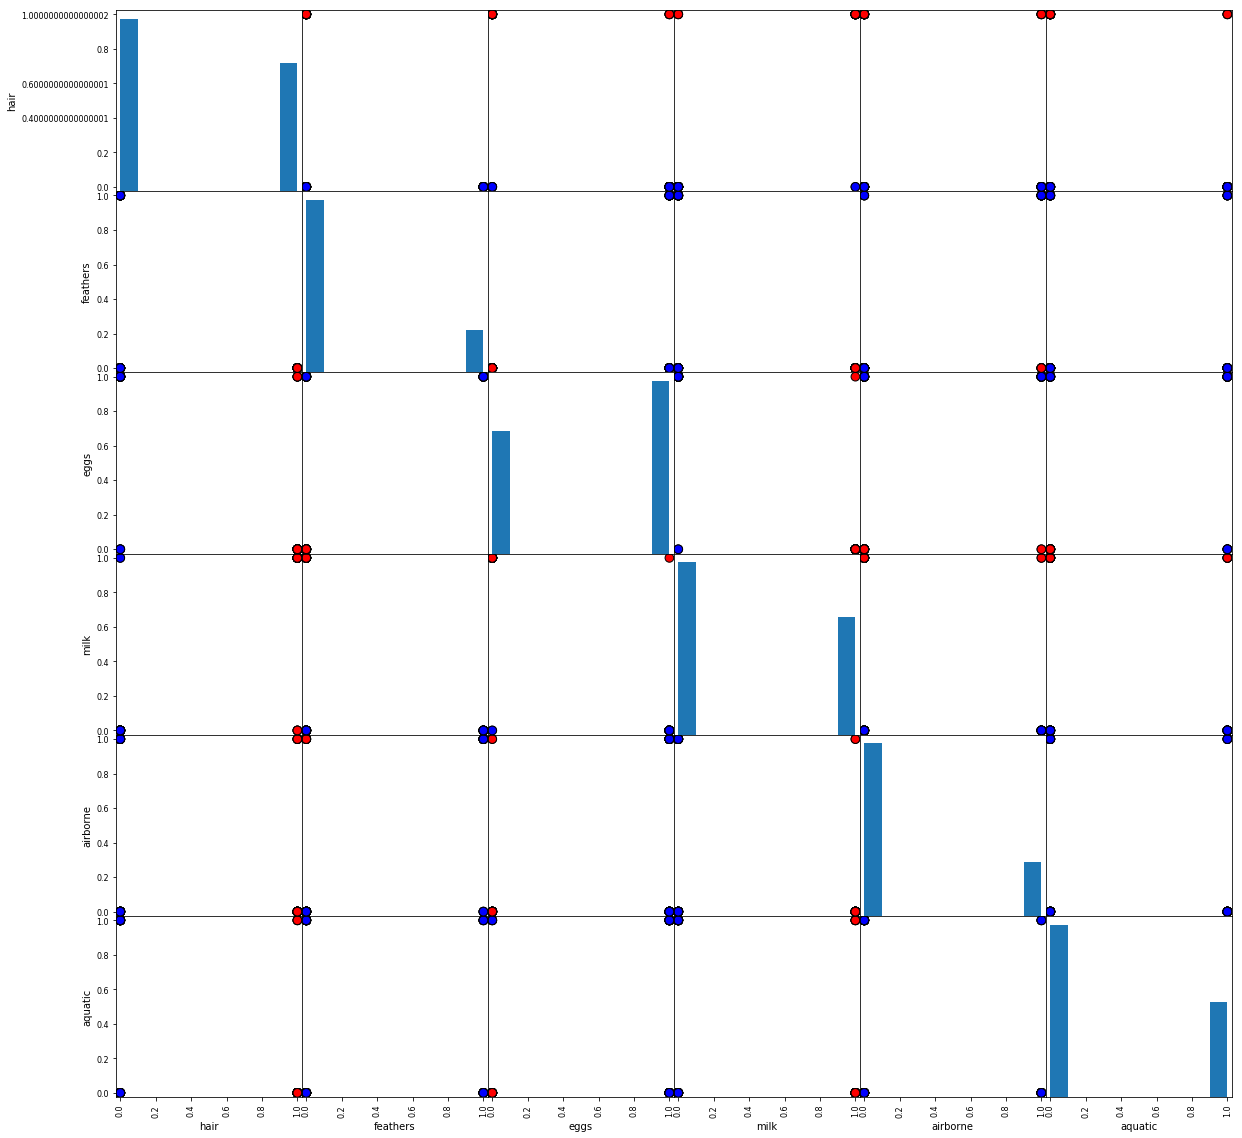

In [69]:
# scatter matrix to observe relationship between every colomn attribute. 
pd.plotting.scatter_matrix(animal.iloc[:,:7],
                                       c=color_list,
                                       figsize= [20,20],
                                       diagonal='hist',
                                       alpha=1,
                                       s = 300,
                                       marker = '.',
                                       edgecolor= "black")
plt.show()


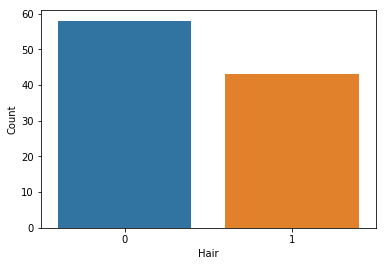

0    58
1    43
Name: hair, dtype: int64

In [70]:
sns.countplot(x="hair", data=animal)
plt.xlabel("Hair")
plt.ylabel("Count")
plt.show()
animal.loc[:,'hair'].value_counts()

In [71]:
# Join animal table and class table to show actual class names
ani_class = pd.read_csv('./inputs/class.csv')
df = pd.merge(animal,ani_class,how='left',left_on='class_type',right_on='Class_Number')
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,...,fins,legs,tail,domestic,catsize,class_type,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,aardvark,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,antelope,1,0,0,1,0,0,0,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
2,bass,0,0,1,0,0,1,1,1,1,...,1,0,1,0,0,4,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
3,bear,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
4,boar,1,0,0,1,0,0,1,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."


In [72]:
# finding Unique value of class_type
type_list = [i for i in df.class_type]
unique_type = list(set(type_list))
unique_type

[1, 2, 3, 4, 5, 6, 7]

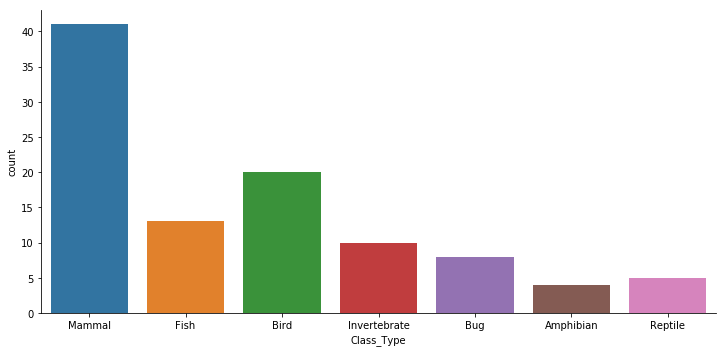

In [73]:
#use seaborn to plot the count of each 7 class_type
sns.factorplot('Class_Type', data=df, kind="count",size = 5,aspect = 2)

In [74]:
# split train test data into 70/30.
from sklearn.model_selection import train_test_split
X = animal.iloc[:,1:17]
y = animal.iloc[:,17]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

## 3. Training and Testing The Data

- Random Forest
- Perceptron
- Support Vector Machine
- K-Nearest Neighbors


### 1. K-Nearest Neighbors

In [75]:
from sklearn.neighbors import KNeighborsClassifier
# Declare the model
clf = KNeighborsClassifier(n_neighbors=3)

# Train the model
clf.fit(X_train, y_train)
y_pred_KNeighborsClassifier = clf.predict(X_test)

scrs = []

#Get Accuracy Score
score = accuracy_score(y_pred_KNeighborsClassifier,y_test)
scrs.append(score)

In [76]:
#use cross validation score since this is a small size dataset 
#Get cross validation score of K-Nearest Neighbors

from sklearn.model_selection import cross_val_score


cv_scores = [] # store cross vadidation score of all the algorithms.

score_knn=cross_val_score(clf, X,y, cv=10)

print("K-Nearest Neighbors Accuracy: %0.2f (+/- %0.2f) with k value equals to 3" % (score_knn.mean(), score_knn.std() * 2))


K-Nearest Neighbors Accuracy: 0.95 (+/- 0.10) with k value equals to 3


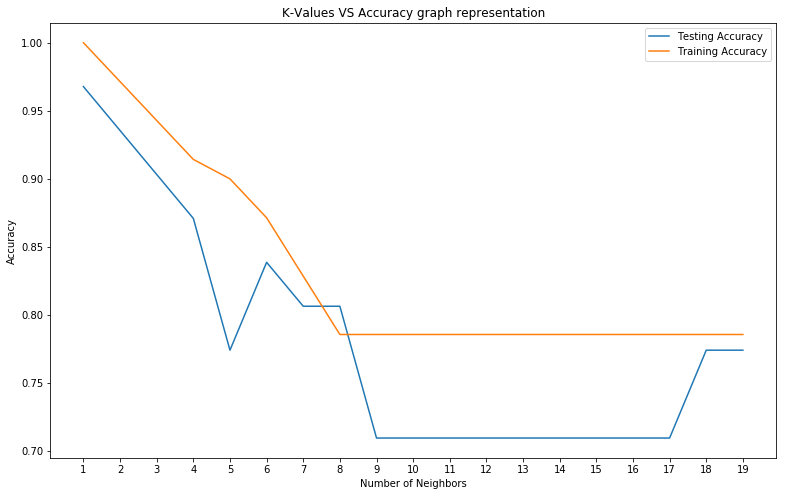

Best accuracy is 0.967741935483871 with K = 1


In [77]:
k_values = np.arange(1,20)
train_accuracy = []
test_accuracy = []

for i, k in enumerate(k_values):
    # k from 1 to 20(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(X_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(X_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(X_test, y_test))


plt.figure(figsize=[13,8])
plt.plot(k_values, test_accuracy, label = 'Testing Accuracy')
plt.plot(k_values, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('K-Values VS Accuracy graph representation')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(k_values)

plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

cv_scores.append(np.max(test_accuracy))

### 2.Support Vector Machine(SVM)

In [78]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Declare the model
svm = SVC(kernel='linear', C=0.2, random_state=0)

# Train the model
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

#Get Accuracy Score
score = accuracy_score(y_pred_svm,y_test)
scrs.append(score)

In [79]:
score_svm=cross_val_score(svm, X,y, cv=10)
print("Support Vector Machine Accuracy: %0.2f (+/- %0.2f)" % (score_svm.mean(), score_svm.std() * 2))
cv_score = score_svm.mean()
cv_scores.append(cv_score)

Support Vector Machine Accuracy: 0.96 (+/- 0.10)


### 3. Decision Tree

In [80]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
from IPython.display import Image
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

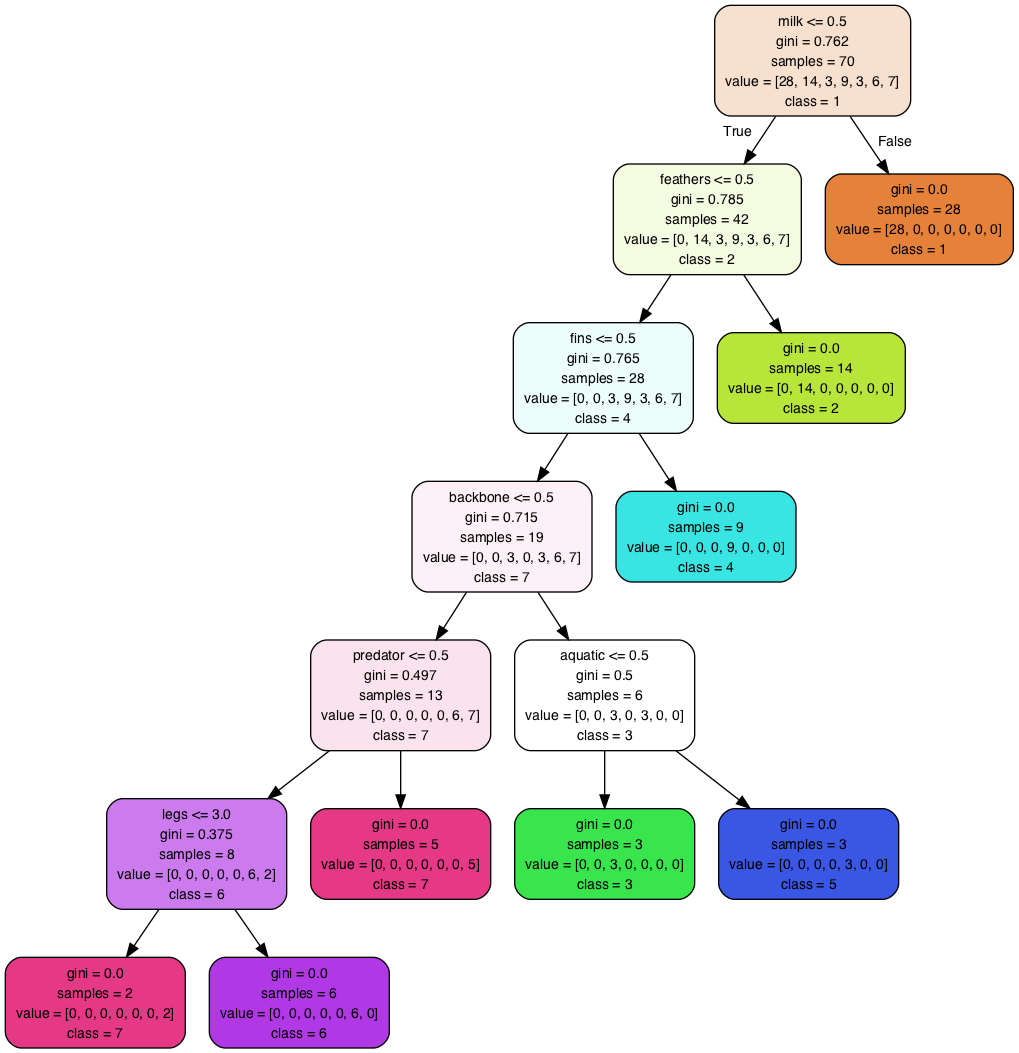

In [81]:
# Declare the model
cf = DecisionTreeClassifier(random_state = 0,criterion='gini')
# train the model
cf.fit(X_train, y_train)

y_pred_DecisionTreeClassifier = cf.predict(X_test)


scr = accuracy_score(y_pred_DecisionTreeClassifier,y_test)
scrs.append(scr)

global tree  
tree = []
tree = cf

dot_data = export_graphviz(tree,
                           filled=True, 
                           rounded=True,
                           class_names=["1","2","3","4","5","6","7" ],
                           feature_names=X.columns,
                           out_file=None) 

graph = graph_from_dot_data(dot_data) 

Image(graph.create_png()) 

In [82]:
from sklearn.model_selection import cross_val_score
score_tree=cross_val_score(cf, X,y, cv=10)
score_tree

array([1. , 1. , 1. , 1. , 0.9, 0.9, 0.8, 1. , 1. , 1. ])

In [83]:
print("Decision Tree Accuracy: %0.2f (+/- %0.2f)" % (score_tree.mean(), score_tree.std() * 2))
cv_score = score_tree.mean()
cv_scores.append(cv_score)

Decision Tree Accuracy: 0.96 (+/- 0.13)


### 4. Random Forest Classifier

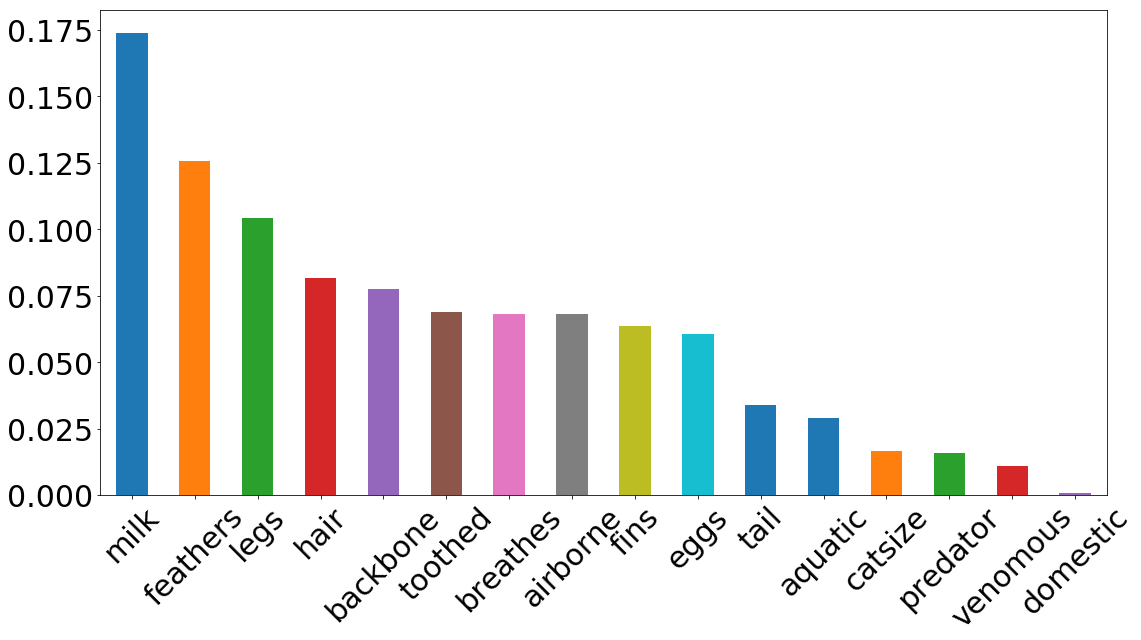

In [84]:
from sklearn.ensemble import RandomForestClassifier


# Declare and train the model
clf = RandomForestClassifier(random_state = 0,n_estimators=25, n_jobs = 2)
clf.fit(X_train, y_train)
y_pred_RandomForestClassifier = clf.predict(X_test)
#Get Accuracy Score
score = accuracy_score(y_pred_RandomForestClassifier,y_test)
scrs.append(score)

global importances
# Get the feature importances
importances = []
importances = clf.feature_importances_


# Convert the importances into one-dimensional 1darray with corresponding df column names as axis labels
f_importances = pd.Series(importances, X.columns)

# Sort the array in descending order of the importances
f_importances.sort_values(ascending=False, inplace=True)

# Make the bar Plot from f_importances 
f_importances.plot(x='Features', y='Importance', kind='bar', figsize=(16,9), rot=45, fontsize=30)

# Show the plot
plt.tight_layout()
plt.show()

In [85]:
#Get cross validation score of random forest model
score_forest=cross_val_score(clf, X,y, cv=10)
score_forest
print("Random Forest Accuracy: %0.2f (+/- %0.2f)" % (score_forest.mean(), score_forest.std() * 2))
cv_score = score_forest.mean()
cv_scores.append(cv_score)

Random Forest Accuracy: 0.97 (+/- 0.09)


### 5. Perceptron Model

In [86]:
from sklearn.linear_model import Perceptron

# Declare the model
clf = Perceptron(eta0=0.1, random_state=0)

# Train the model
clf.fit(X_train, y_train)
y_pred_Perceptron = clf.predict(X_test)
#Get Accuracy Score
score = accuracy_score(y_pred_Perceptron,y_test)
scrs.append(score)

In [87]:
#Get cross validation score of Perceptron
score_perceptron=cross_val_score(clf, X,y, cv=10)
score_perceptron
print("Perceptron Accuracy: %0.2f (+/- %0.2f)" % (score_perceptron.mean(), score_perceptron.std() * 2))
cv_score = score_perceptron.mean()
cv_scores.append(cv_score)

Perceptron Accuracy: 0.93 (+/- 0.09)


# Comparision of All 5 Algorithm

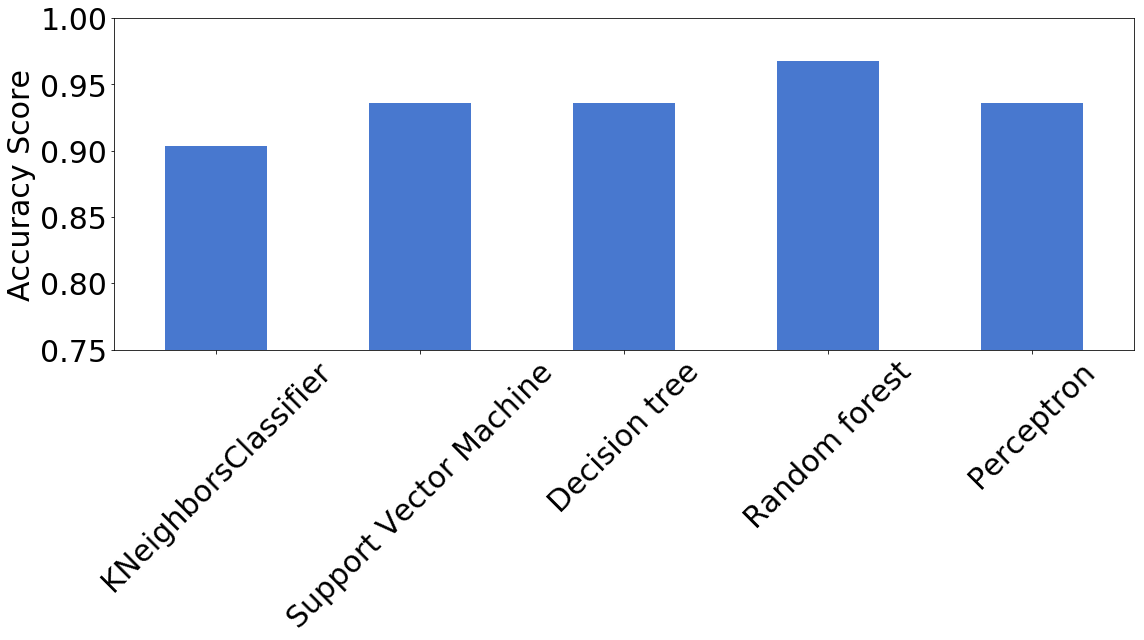

In [88]:
# Convert the Accuracy Scores into one-dimensional 1darray with corresponding classifier names as axis labels

Acc_scores = pd.Series(scrs, ['KNeighborsClassifier','Support Vector Machine','Decision tree', 'Random forest','Perceptron'])

current_palette = sns.color_palette("muted", n_colors=5)
cmap = ListedColormap(sns.color_palette(current_palette).as_hex())
#colors = np.random.randint(0,5,5)

# Make the bar Plot from f_importances 
Acc_scores.plot(x='Classifiers', y='Accuracy scores',kind = 'bar',figsize=(16,9), rot=45, fontsize=30, colormap=cmap)
#plt.bar(fscores,clfs)
plt.xlabel('', fontsize=30)
plt.ylabel('Accuracy Score', fontsize=30)
plt.ylim([0.75,1])
# Show the plot
plt.tight_layout()
plt.show()
